<a href="https://colab.research.google.com/github/Hari-Priya-18/Image-denoising/blob/main/band3_rad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Size of loaded data: 524288
Expected size for shape (512, 256, 4): 524288


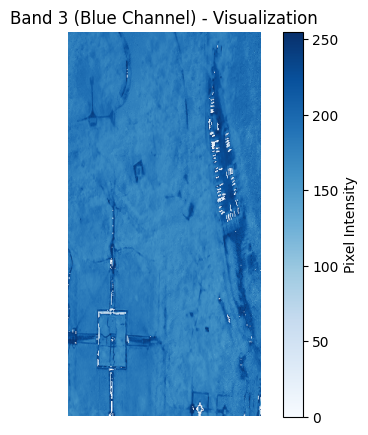

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to load the .rad file
def load_rad_image(path, shape=(512, 256, 4)):  # Update shape to include 4 channels
    with open(path, 'rb') as f:
        image_data = np.fromfile(f, dtype=np.uint8)
        print(f"Size of loaded data: {image_data.size}")
        expected_size = shape[0] * shape[1] * shape[2]
        print(f"Expected size for shape {shape}: {expected_size}")
        image = image_data.reshape(shape)
    return image

# Load the band3_image2.rad file
image_path = '/content/band3_image2.rad'
band3_img_rgba = load_rad_image(image_path)

# Extract the blue channel (index 2)
band3_img = band3_img_rgba[:, :, 2]

# Display using matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(band3_img, cmap='Blues')  # Use 'gray' or 'Blues' for band3 (Blue)
plt.title("Band 3 (Blue Channel) - Visualization")
plt.axis('off')
plt.colorbar(label='Pixel Intensity')
plt.show()

Size of loaded data: 524288
Expected size for shape (512, 256, 4): 524288


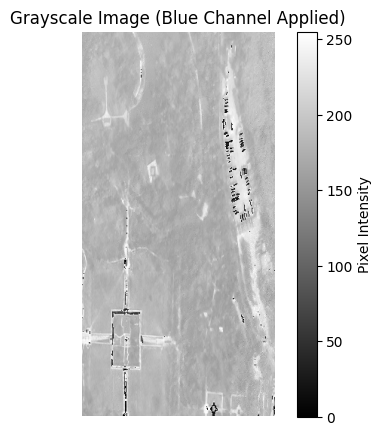

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to load .rad file
def load_rad_image(path, shape=(512, 256, 4)):  # Update shape as per your file
    with open(path, 'rb') as f:
        image_data = np.fromfile(f, dtype=np.uint8)
        print(f"Size of loaded data: {image_data.size}")
        expected_size = shape[0] * shape[1] * shape[2]
        print(f"Expected size for shape {shape}: {expected_size}")
        image = image_data.reshape(shape)
    return image

# Load the image
image_path = '/content/band3_image2.rad'
image_rgba = load_rad_image(image_path)

# Extract the desired channel (e.g., blue channel, index 2) for grayscale visualization
image = image_rgba[:, :, 2]


# Display the image in grayscale
plt.figure(figsize=(6, 5))
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image (Blue Channel Applied)")
plt.axis('off')
plt.colorbar(label='Pixel Intensity')
plt.show()

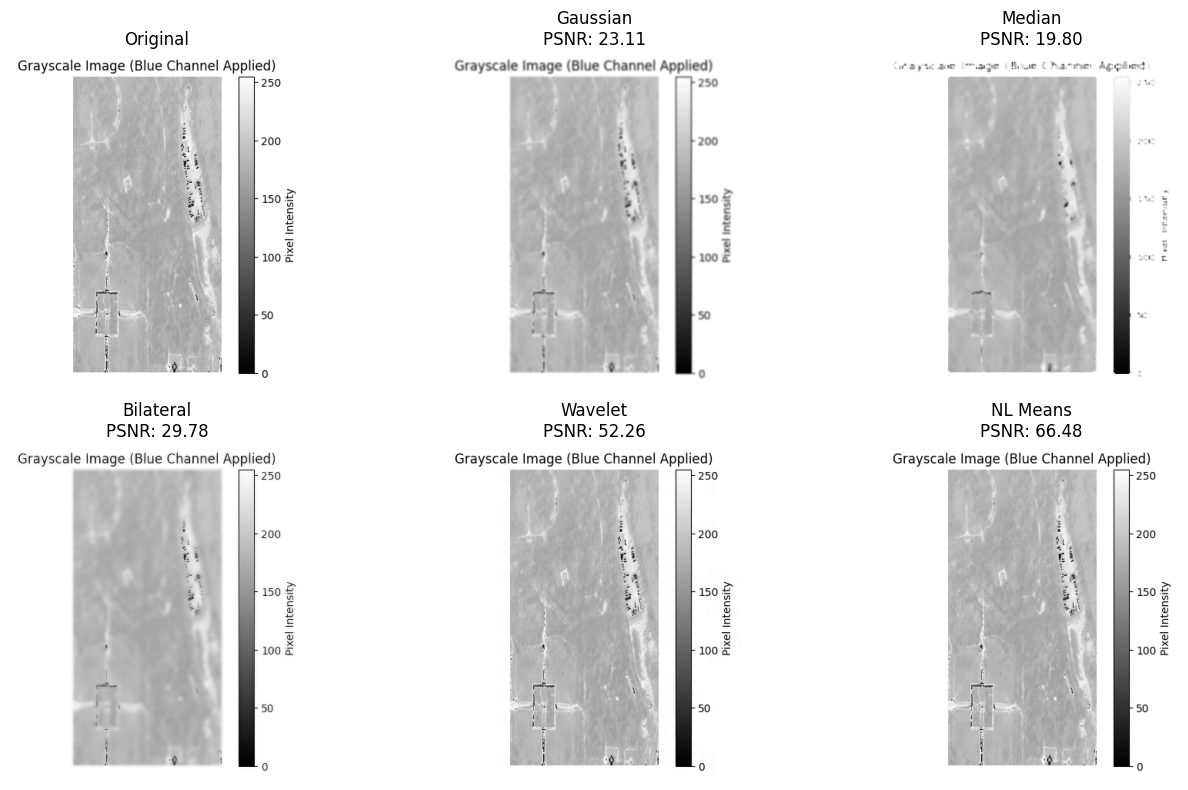

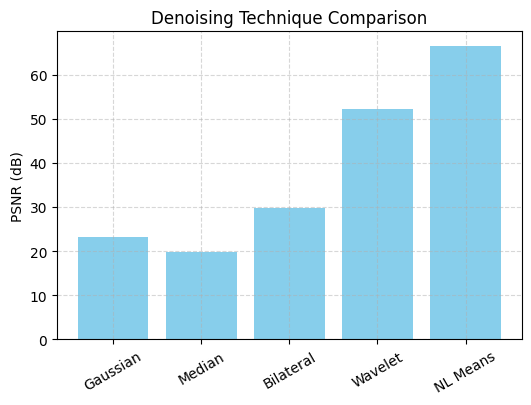

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet, denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio as psnr

image = cv2.imread("/content/band3_rad_2.png", cv2.IMREAD_GRAYSCALE)

# Normalize for denoising functions
image_normalized = image / 255.0

# Store PSNRs
psnr_results = {}

# 1. Gaussian Denoising
gaussian = cv2.GaussianBlur(image, (5, 5), 0)
psnr_results['Gaussian'] = psnr(image, gaussian)

# 2. Median Denoising
median = cv2.medianBlur(image, 5)
psnr_results['Median'] = psnr(image, median)

# 3. Bilateral Denoising
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
psnr_results['Bilateral'] = psnr(image, bilateral)

# 4. Wavelet Denoising
wavelet = denoise_wavelet(image_normalized, channel_axis=None, rescale_sigma=True)
wavelet = (wavelet * 255).astype(np.uint8)
psnr_results['Wavelet'] = psnr(image, wavelet)

# 5. Non-Local Means Denoising
sigma_est = np.mean(estimate_sigma(image_normalized, channel_axis=None))
nlm = denoise_nl_means(image_normalized, h=1.15 * sigma_est, fast_mode=True,
                       patch_size=5, patch_distance=6, channel_axis=None)
nlm = (nlm * 255).astype(np.uint8)
psnr_results['NL Means'] = psnr(image, nlm)

# 🖼️ Visualization
titles = ["Original", "Gaussian", "Median", "Bilateral", "Wavelet", "NL Means"]
images = [image, gaussian, median, bilateral, wavelet, nlm]

plt.figure(figsize=(14, 8))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    title_text = titles[i]
    psnr_val = psnr_results.get(titles[i], 'N/A')
    if psnr_val != 'N/A':
        title_text += f"\nPSNR: {psnr_val:.2f}"
    plt.title(title_text)
    plt.axis("off")
plt.tight_layout()
plt.show()

# 📊 Bar Chart of PSNRs
plt.figure(figsize=(6, 4))
plt.bar(psnr_results.keys(), psnr_results.values(), color='skyblue')
plt.ylabel("PSNR (dB)")
plt.title("Denoising Technique Comparison")
plt.xticks(rotation=30)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()